<class 'numpy.ndarray'> (1536000,) 48000


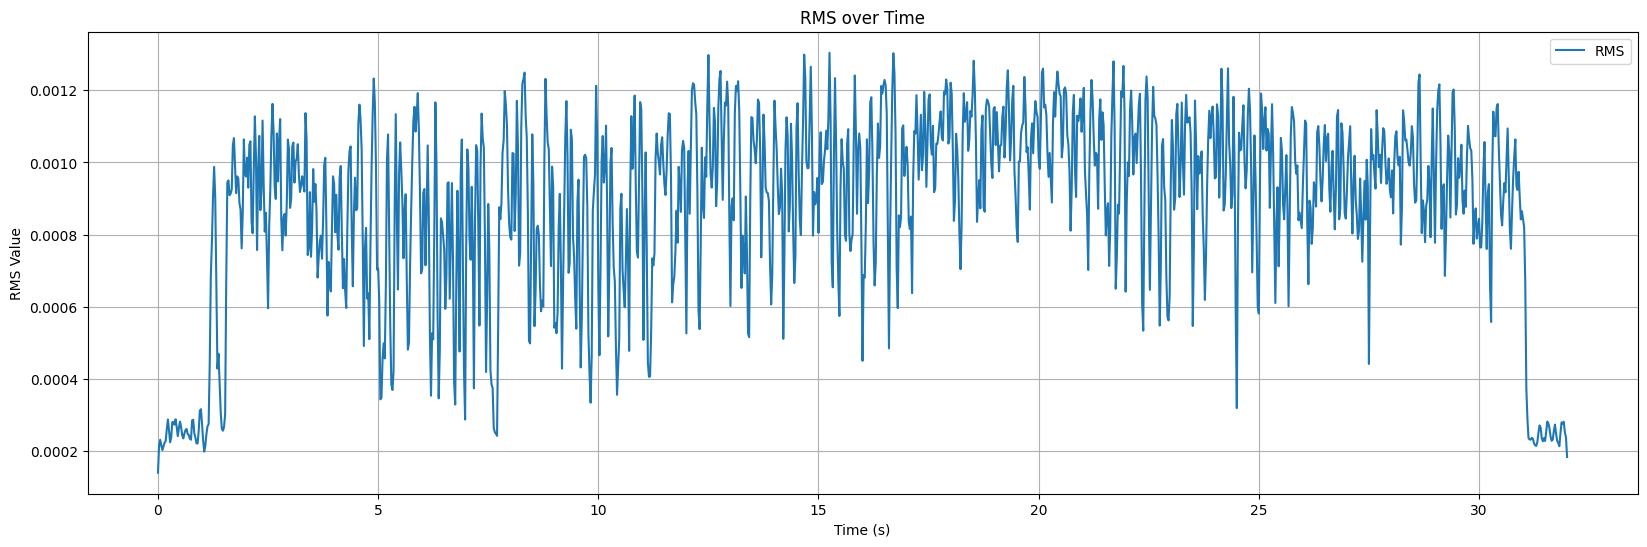

<class 'numpy.ndarray'> (1536000,) 48000


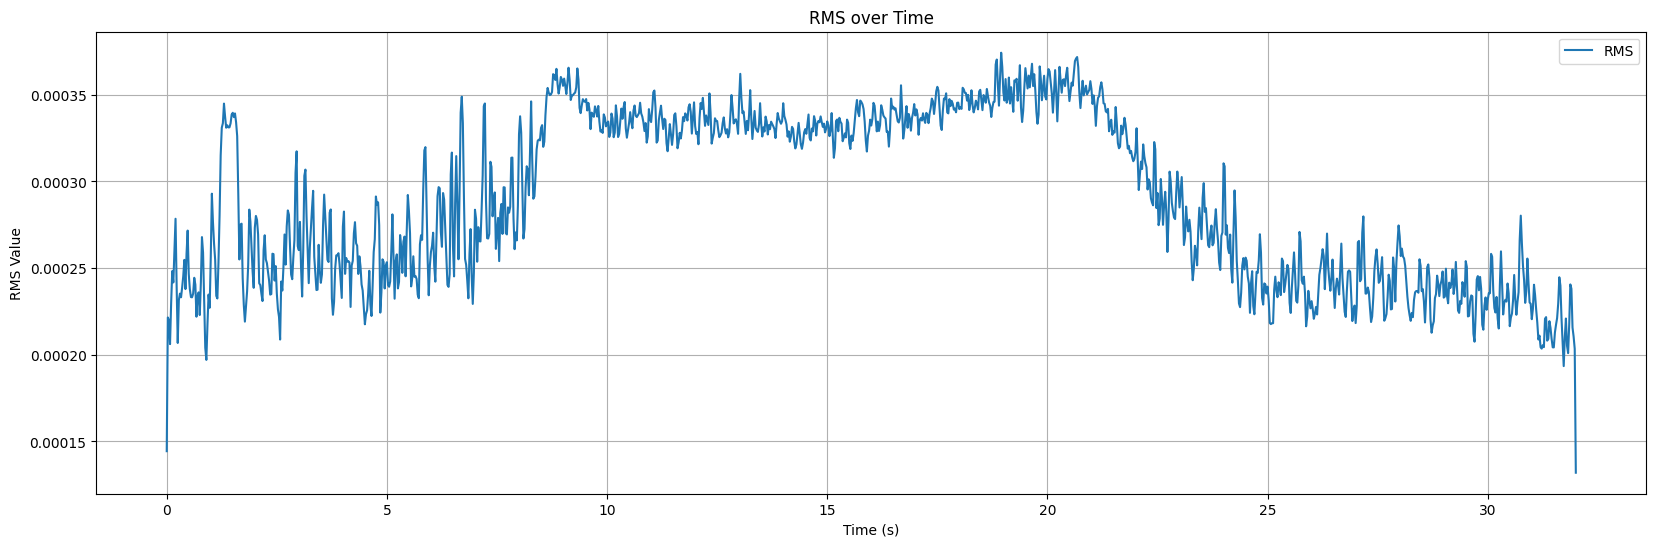

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

def analyze_audio_rms(audio_file, frame_duration=0.05, hop_duration=0.025, n_std=2):
    """
    分析音頻文件的 RMS 值並繪製隨時間變化的曲線。

    參數:
        audio_file (str): 音頻文件的路徑。
        frame_duration (float): 分析窗口大小，單位為秒 (默認為 0.05 秒)。
        hop_duration (float): 移動步長，單位為秒 (默認為 0.025 秒)。
        n_std (int): 標準差濾波器的係數 (默認為 4)。
    """
    # 載入音頻文件
    y, sr = librosa.load(audio_file, sr=None)
    print(type(y), y.shape, sr)
    # 設置分析窗口大小和移動步長
    frame_length = int(frame_duration * sr)
    hop_length = int(hop_duration * sr)

    def calcu_std(data, n):
        """標準差過濾"""
        mean_value = np.mean(data)
        std_dev = np.std(data)
        threshold_upper = mean_value + n * std_dev
        threshold_lower = mean_value - n * std_dev
        return np.where((data > threshold_upper) | (data < threshold_lower), 0, data)

    # 計算每一幀的 RMS 值
    filtered_y = calcu_std(y, n_std)
    rms = librosa.feature.rms(y=filtered_y, frame_length=frame_length, hop_length=hop_length)[0]

    
    # 將時間對應到每個RMS值
    times = librosa.frames_to_time(np.arange(len(rms)), sr=sr, hop_length=hop_length)
    # 繪製RMS值隨時間變化的曲線
    plt.figure(figsize=(20, 6))
    plt.plot(times, rms, label='RMS')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Value')
    plt.title('RMS over Time')
    plt.legend()
    plt.grid()
    plt.show()

# 使用範例
# 將音頻文件路徑傳入函數
#analyze_audio_rms(audio_file=r'20250108_C\C_TypeA_3.wav')

analyze_audio_rms(audio_file=r'20250108\TypeA_8.wav')
analyze_audio_rms(audio_file=r'20250108_N\TypeA.wav')

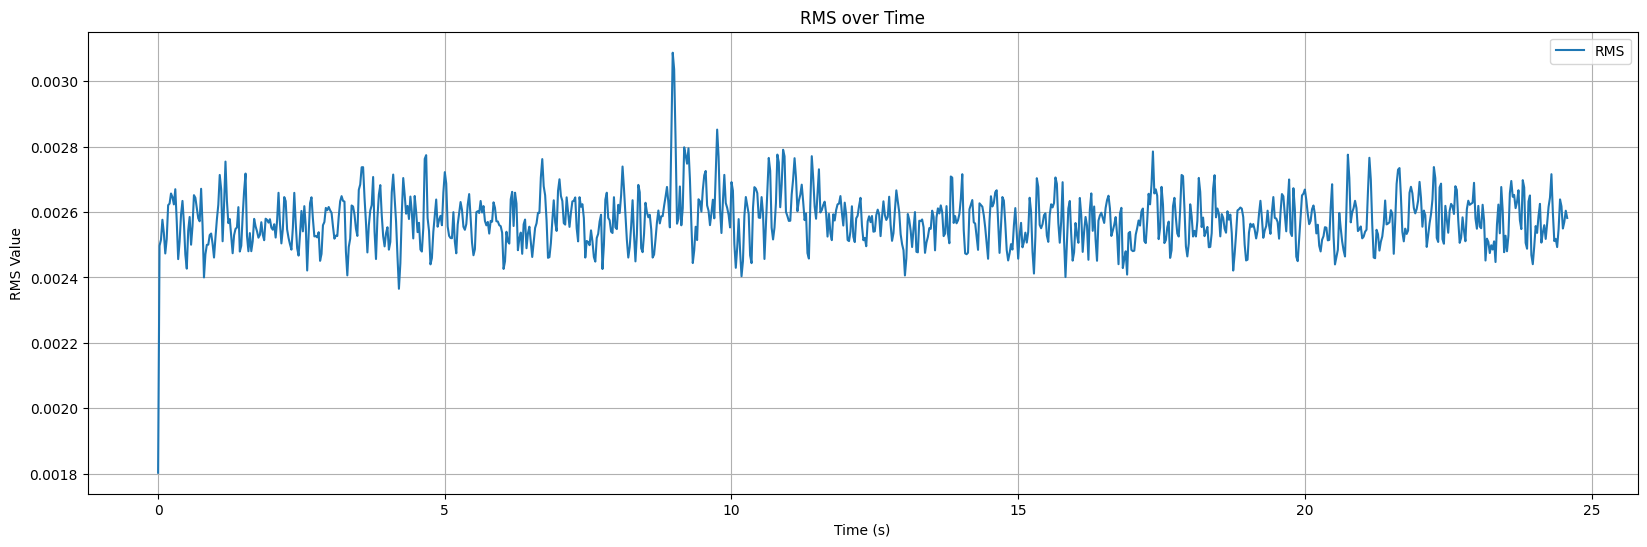

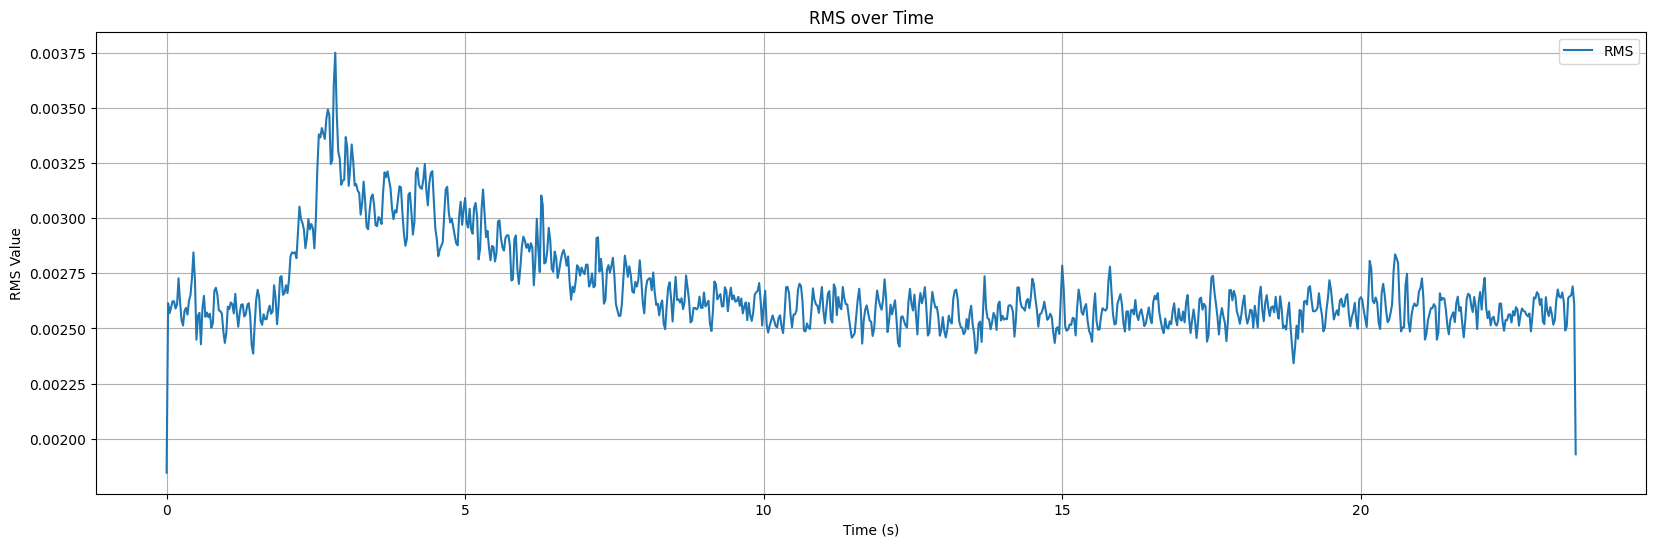

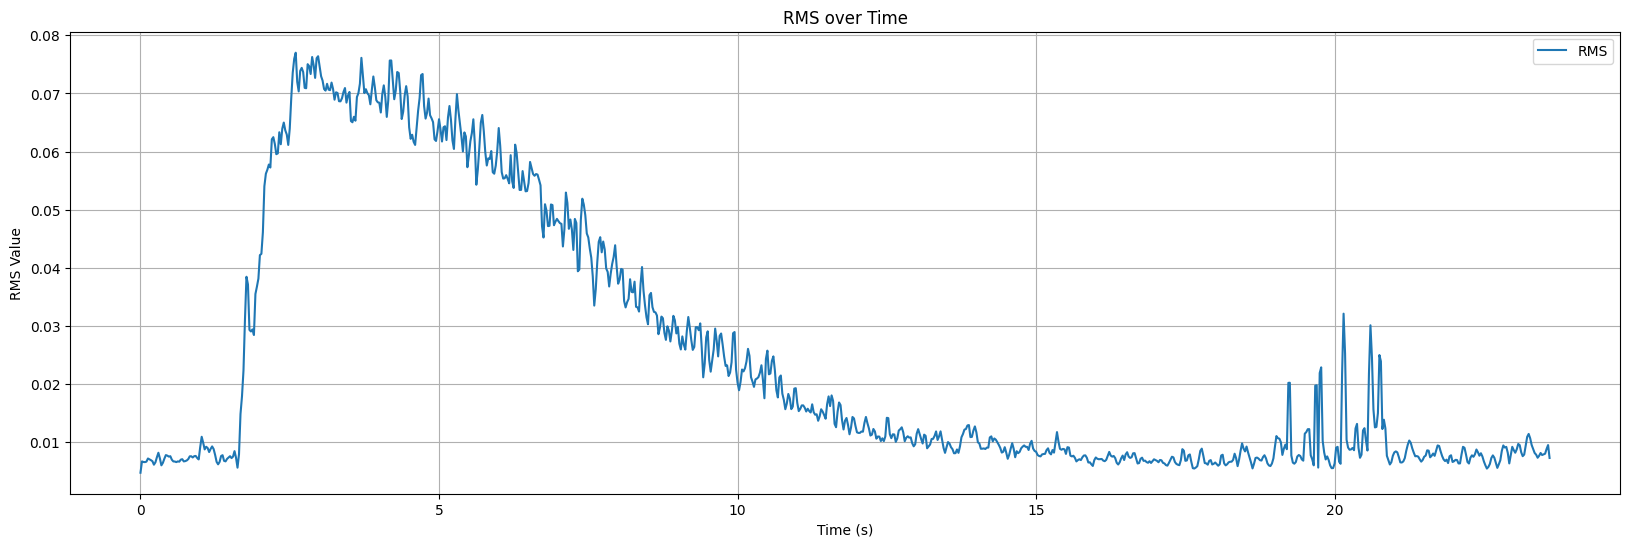

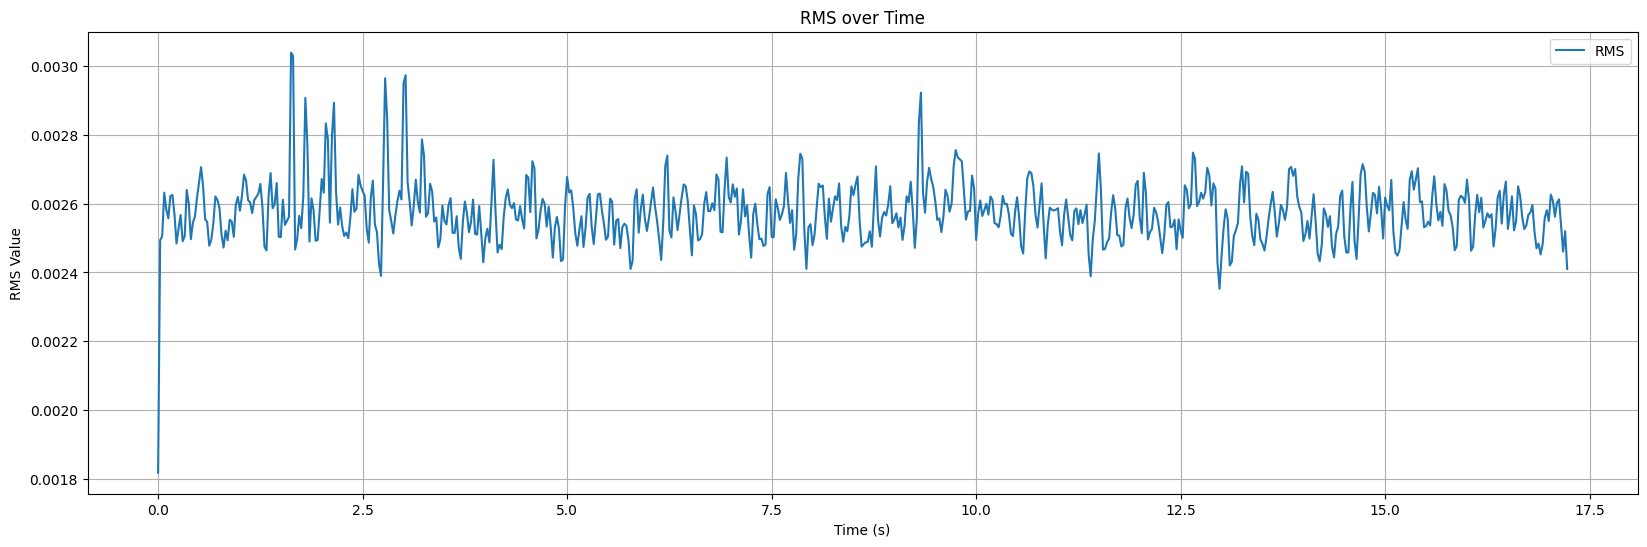

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

def analyze_audio_rms(audio_file, frame_duration=0.05, hop_duration=0.025, n_std=4):
    """
    分析音頻文件的 RMS 值並繪製隨時間變化的曲線。

    參數:
        audio_file (str): 音頻文件的路徑。
        frame_duration (float): 分析窗口大小，單位為秒 (默認為 0.05 秒)。
        hop_duration (float): 移動步長，單位為秒 (默認為 0.025 秒)。
        n_std (int): 標準差濾波器的係數 (默認為 4)。
    """
    # 載入音頻文件
    y, sr = librosa.load(audio_file, sr=None)

    # 設置分析窗口大小和移動步長
    frame_length = int(frame_duration * sr)
    hop_length = int(hop_duration * sr)

    def calcu_std(data, n):
        """標準差過濾"""
        mean_value = np.mean(data)
        std_dev = np.std(data)
        threshold_upper = mean_value + n * std_dev
        threshold_lower = mean_value - n * std_dev
        return np.where((data > threshold_upper) | (data < threshold_lower), 0, data)

    # 計算每一幀的 RMS 值
    filtered_y = calcu_std(y, n_std)
    rms = librosa.feature.rms(y=filtered_y, frame_length=frame_length, hop_length=hop_length)[0]

    # 將時間對應到每個RMS值
    times = librosa.frames_to_time(np.arange(len(rms)), sr=sr, hop_length=hop_length)

    # 繪製RMS值隨時間變化的曲線
    plt.figure(figsize=(20, 6))
    plt.plot(times, rms, label='RMS')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Value')
    plt.title('RMS over Time')
    plt.legend()
    plt.grid()
    plt.show()

# 使用範例
# 將音頻文件路徑傳入函數

analyze_audio_rms(audio_file=r"20250117/1.wav")
analyze_audio_rms(audio_file=r"20250117/2.wav")
analyze_audio_rms(audio_file=r"20250117/2B.wav")

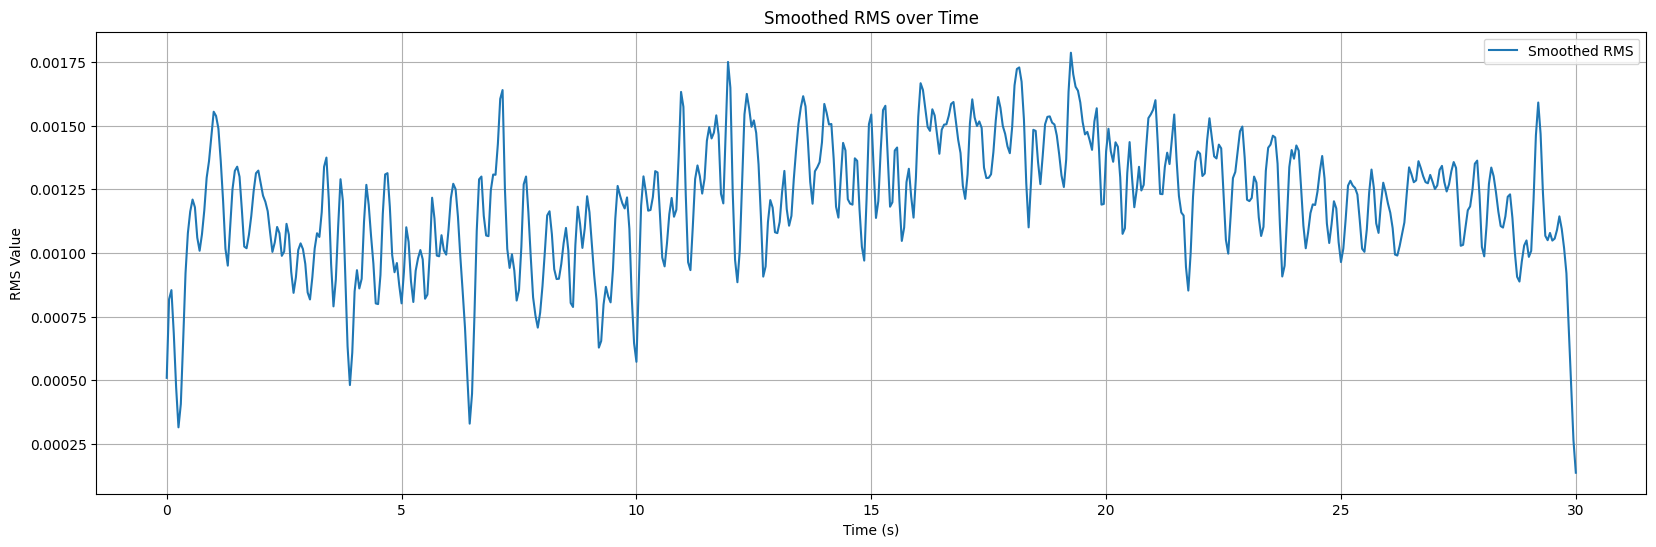

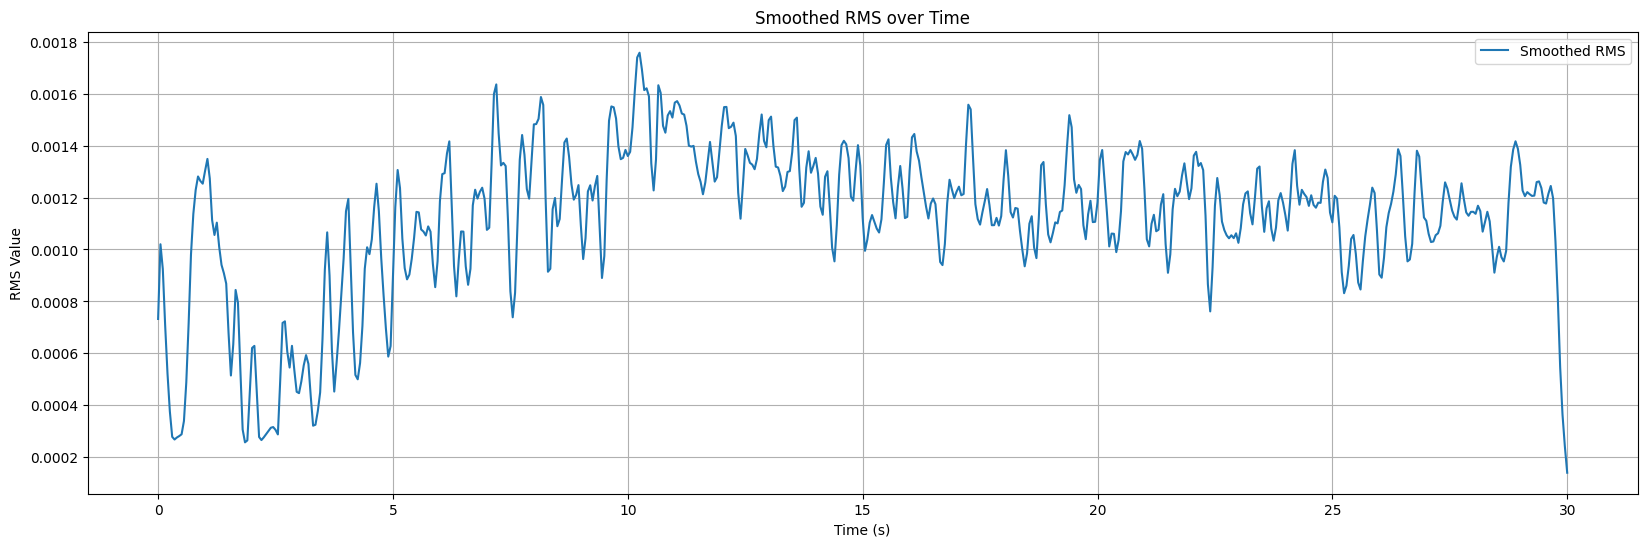

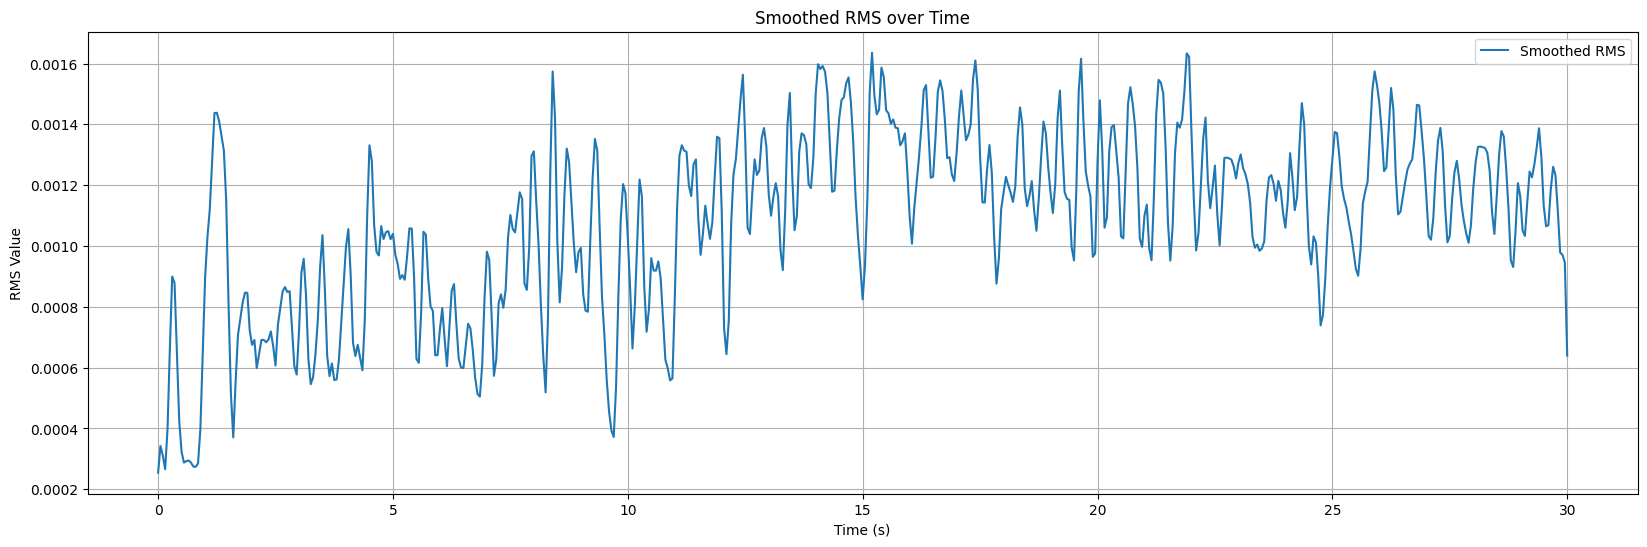

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

def analyze_audio_rms(audio_file, frame_duration=0.1, hop_duration=0.05, n_std=4, smooth_width=3):
    """
    分析音頻文件的 RMS 值並繪製隨時間變化的曲線。

    參數:
        audio_file (str): 音頻文件的路徑。
        frame_duration (float): 分析窗口大小，單位為秒 (默認為 0.05 秒)。
        hop_duration (float): 移動步長，單位為秒 (默認為 0.025 秒)。
        n_std (int): 標準差濾波器的係數 (默認為 4)。
        smooth_width (int): 八度平滑窗口寬度，默認為 3。
    """
    # 載入音頻文件
    y, sr = librosa.load(audio_file, sr=None)

    # 設置分析窗口大小和移動步長
    frame_length = int(frame_duration * sr)
    hop_length = int(hop_duration * sr)

    def calcu_std(data, n):
        """標準差過濾"""
        mean_value = np.mean(data)
        std_dev = np.std(data)
        threshold_upper = mean_value + n * std_dev
        threshold_lower = mean_value - n * std_dev
        return np.where((data > threshold_upper) | (data < threshold_lower), 0, data)

    def oct_smooth(data, width):
        """八度平滑，使用移動平均法進行數據平滑"""
        return np.convolve(data, np.ones(width) / width, mode='same')

    # 計算每一幀的 RMS 值
    filtered_y = calcu_std(y, n_std)
    rms = librosa.feature.rms(y=filtered_y, frame_length=frame_length, hop_length=hop_length)[0]

    # 對 RMS 值進行八度平滑
    smoothed_rms = oct_smooth(rms, smooth_width)

    # 將時間對應到每個 RMS 值
    times = librosa.frames_to_time(np.arange(len(smoothed_rms)), sr=sr, hop_length=hop_length)

    # 繪製 RMS 值隨時間變化的曲線
    plt.figure(figsize=(20, 6))
    plt.plot(times, smoothed_rms, label='Smoothed RMS')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Value')
    plt.title('Smoothed RMS over Time')
    plt.legend()
    plt.grid()
    plt.show()

# 使用範例
# 將音頻文件路徑傳入函數
analyze_audio_rms(audio_file=r'20250108_C\C_TypeA_8.wav')
analyze_audio_rms(audio_file=r'20250108_C\C_TypeB_2.wav')
analyze_audio_rms(audio_file=r'20250108_C\C_TypeC_1.wav')


